### Library Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from ydata_profiling import ProfileReport

from platform import python_version
print(f'Pandas version: {pd.__version__}\nPython version: {python_version()}\nNumpy  version: {np.__version__}')

Pandas version: 1.5.3
Python version: 3.9.16
Numpy  version: 1.23.5


### Loading Dataset

In [2]:
# loading dataset
df = pd.read_csv('./data/Sleep_Efficiency.csv')

### Data Information and Exploration

In [3]:
# Getting the number of columns and rows of the dataset
# Getting the top 5 of the dataset to have a visual of the data
print(df.shape)
df.head()

(452, 15)


,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [4]:
# Checking the datatypes of the columns and how many each datatypes are and checking for nulls.
# df.dtypes - Another was to get the datatypes of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [5]:
# Identifying which columns has missing data.
df.isna().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

In [6]:
# Showing the columns with the missing data only with the corresponding numbers of missing data.
df.isna().sum()[df.isna().sum() > 0]

Awakenings              20
Caffeine consumption    25
Alcohol consumption     14
Exercise frequency       6
dtype: int64

In [7]:
# Drop missing data and save it to a csv
# Showing the shape and top 5 of the dataset

df = df.dropna()
df.to_csv('./data/Sleep_Efficiency_clean.csv', index=False)
df.reset_index=True

print(f'Total of rows: {df.dropna().shape}')

df.head()

Total of rows: (388, 15)


,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [8]:
# Dropping column ID
df = df.drop(['ID'], axis=1)

In [9]:
# Save dataset to data
data = df.copy()
data.head()

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [ ]:
profile = ProfileReport(df)
#profile.to_notebook_iframe()
#profile.to_file('./eda/sleep_efficiency_cleandata.html')

In [10]:
data['Caffeine consumption'].value_counts()

0.0      195
50.0      97
25.0      73
75.0      19
200.0      3
100.0      1
Name: Caffeine consumption, dtype: int64

### Visualizations

<Figure size 800x400 with 0 Axes>

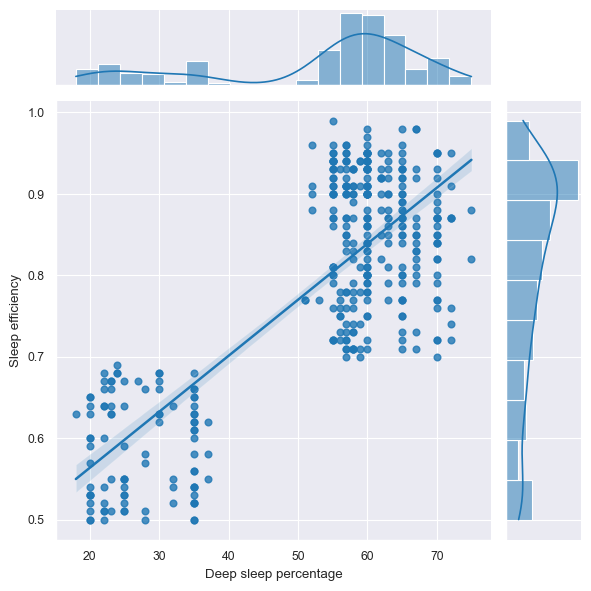

In [35]:
#Deep sleep percentage - the percentage of total sleep time spent in deep sleep

# What is the sleep efficiency of Deep Sleep?
## 55-70, get high SL
## 20-30 , gets less SL

sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
sns.jointplot(x='Deep sleep percentage', y='Sleep efficiency', data = data, kind = 'reg',)

<Figure size 800x400 with 0 Axes>

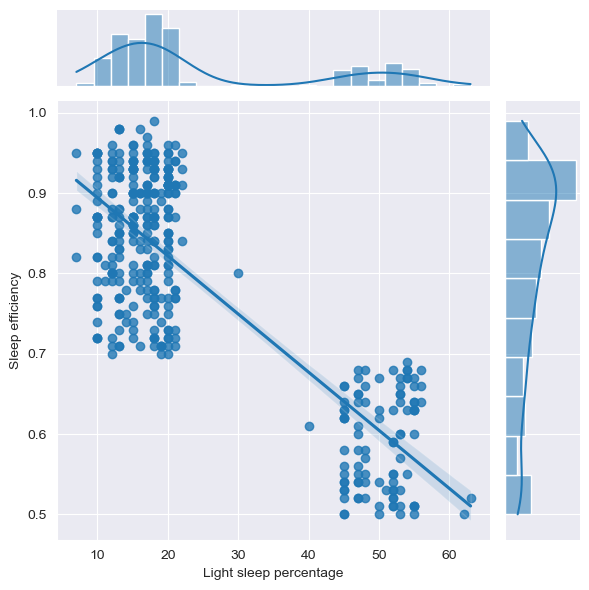

In [12]:
# Light sleep percentage -  the percentage of total sleep time spent in light sleep

# What is the sleep efficiency of Light Sleep?
# 10-20, gets high SL
# 45-55, get less SL

sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
sns.jointplot(x='Light sleep percentage', y='Sleep efficiency', data = data, kind = 'reg')

<Figure size 800x400 with 0 Axes>

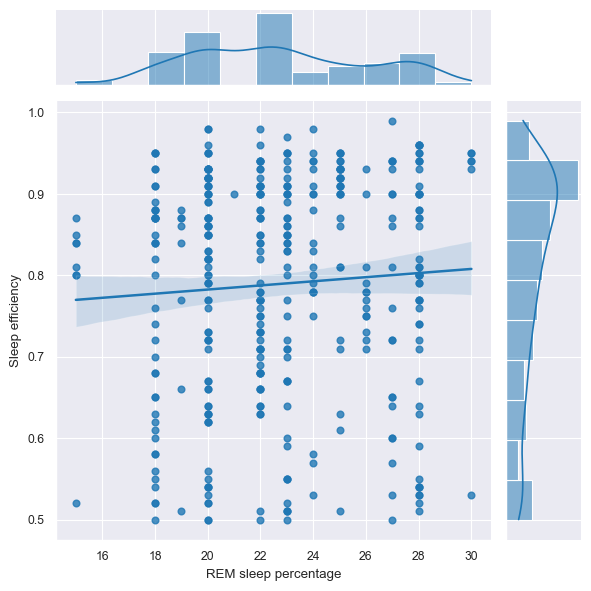

In [26]:
# REM sleep percentage -  the percentage of total sleep time spent in REM sleep

# What is the sleep efficiency of REM Sleep?
# this is showing high efficiency on REM 20-23

sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
sns.jointplot(x='REM sleep percentage', y='Sleep efficiency', data = data, kind = 'reg')

<AxesSubplot:xlabel='Gender', ylabel='Deep sleep percentage'>

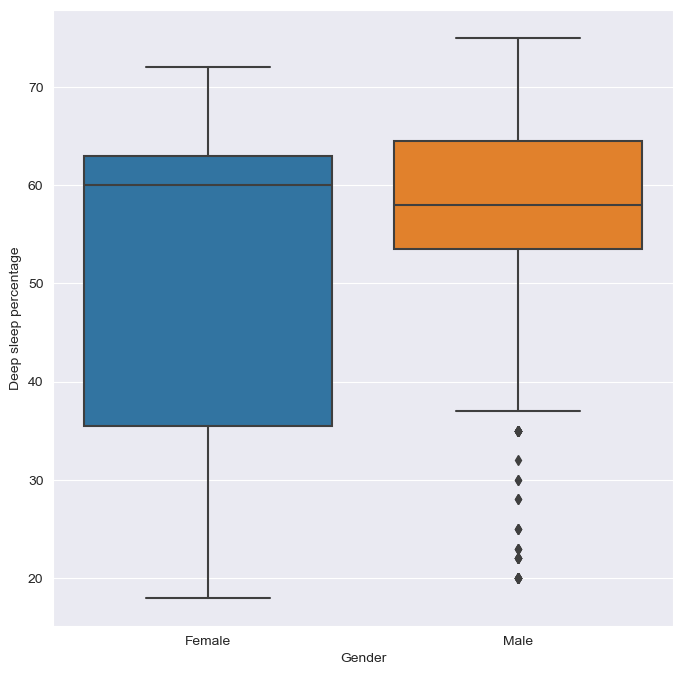

In [15]:
# What is Deep sleep percentage per gender looks like?

# Female has a more spread when it comes to deep sleep that Male

sns.set_style('darkgrid')
plt.figure(figsize=(8,8))
sns.boxplot(x='Gender', y='Deep sleep percentage', data=data)

<AxesSubplot:xlabel='Alcohol consumption', ylabel='Deep sleep percentage'>

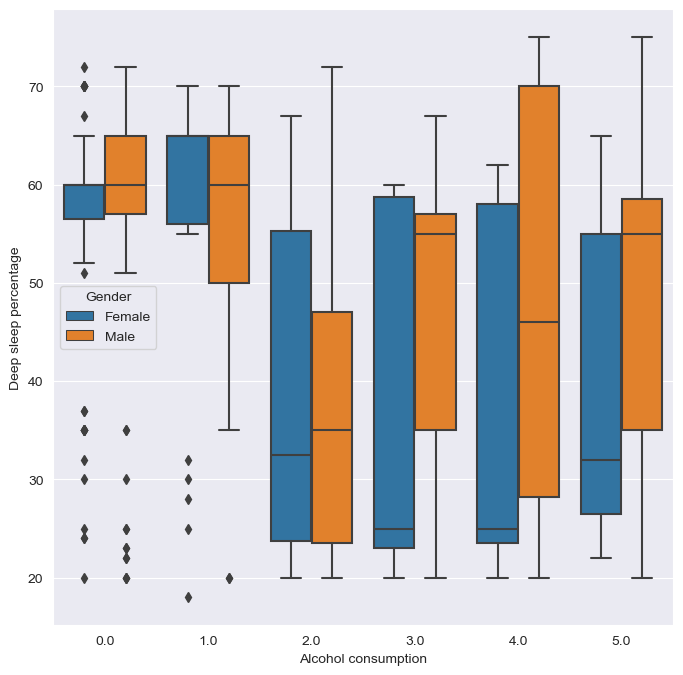

In [16]:
# What is Deep sleep percentage per gender that had an Alcohol looks like?

# With alcohol consumption the Male gets to sleep better that Female

sns.set_style('darkgrid')
plt.figure(figsize=(8,8))
sns.boxplot(x='Alcohol consumption', y='Deep sleep percentage', data=data, hue ='Gender' )

C:\Users\heinr\AppData\Local\Temp\ipykernel_5476\3792044196.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_heat = data.corr()


<AxesSubplot:>

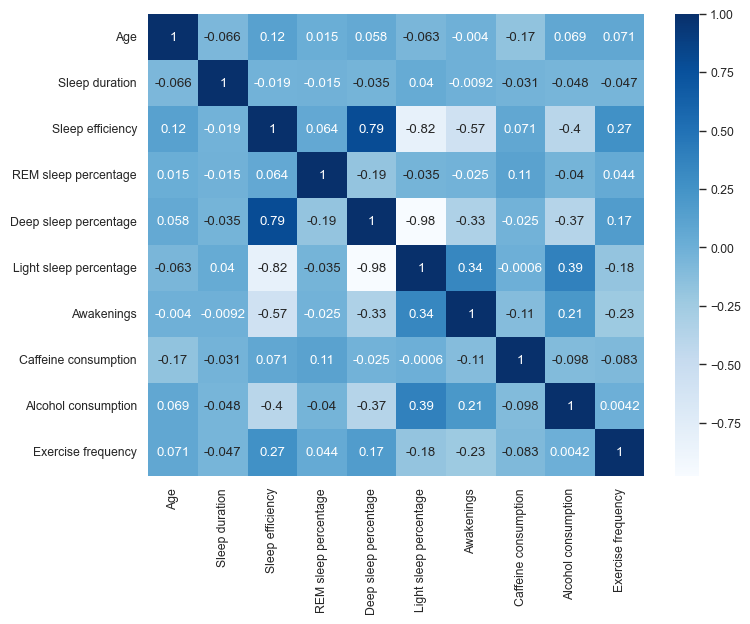

In [21]:
# Heatmap showing a high Sleep Efficiency on Deep Sleep Percentage and low at Light Sleep Percentage

plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1)

data_heat = data.corr()

sns.heatmap(data_heat, annot=True, cmap='Blues')
